# Project - Stock Market Data Analysis

We will be looking at data from the technology stock market.

Use Pandas to get stock information, visualise the data and look at a few ways of anaylsing the risk of a stock, based on its previous performance history.

Finally, I will then predict future stock prices usung a Monte Carlo method.

A few questions that I'm interested in:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How can we try to predict future stock behaviour?

In [1]:
# Import NumPy and Pandas to retrieve stock info and set up dataframes for basic analysis
import numpy as np
from numpy.random import randn
import pandas as pd

# Import stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# Change Theme of plots for better visualization
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1, spines=True, gridlines='--')

In [2]:
from pandas_datareader import data as pdr  #Allows us to read stock information from yahoo finanace

from datetime import datetime # Time Stamps sets start and end date

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
# Apple, Google, Microsoft, Amazon

In [4]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day) # 1 year before todays date

In [5]:
#Grab finance data from yahoo 
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

Globals takes the stock ticker and makes it into a global variable which allows me to call any stock as a dataframe by calling its string variable. For example:

In [6]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-08,57.014999,56.082500,56.455002,56.099998,111820000.0,55.548851
2019-10-09,56.947498,56.410000,56.757500,56.757500,74770400.0,56.199894
2019-10-10,57.610001,56.825001,56.982498,57.522499,113013600.0,56.957375
2019-10-11,59.410000,58.077499,58.237499,59.052502,166795600.0,58.472343
2019-10-14,59.532501,58.667500,58.724998,58.967499,96427600.0,58.388180
...,...,...,...,...,...,...
2020-10-02,115.370003,112.220001,112.889999,113.019997,144712000.0,113.019997
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,116.500000
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,113.160004


# Basic Analysis of stock info for Google

Shall be analysing the Google stock information, to showcase techniques. All techniques apply for the various stocks.

In [7]:
# Summary Stats
GOOG.describe() # Adj close takes into account any stock changes

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,1401.887666,1369.835501,1384.956283,1386.802222,1.791566e+06,1386.802222
std,127.221584,128.740925,128.419488,127.608001,7.738446e+05,127.608001
min,1071.319946,1013.536011,1056.510010,1056.619995,3.475000e+05,1056.619995
25%,1309.047485,1291.807526,1297.920013,1298.897522,1.294125e+06,1298.897522
50%,1417.590027,1387.585022,1398.679993,1404.079956,1.582550e+06,1404.079956
75%,1494.583740,1465.542511,1478.482483,1482.649963,1.994375e+06,1482.649963
max,1733.180054,1666.329956,1709.713989,1728.280029,4.267700e+06,1728.280029


In [8]:
# General Info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-10-08 to 2020-10-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    int64  
 5   Adj Close  254 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


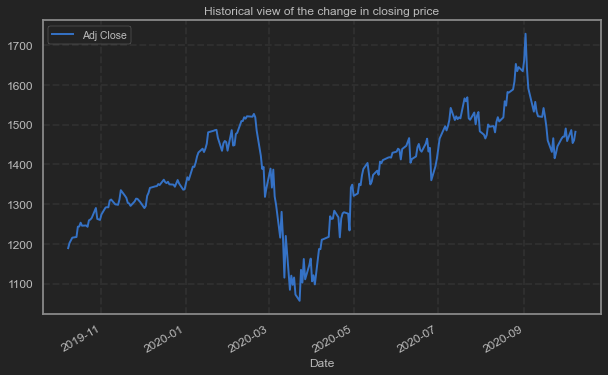

In [9]:
GOOG['Adj Close'].plot(legend= True, figsize = (10,6), fontsize = 12, title = "Historical view of the change in closing price")

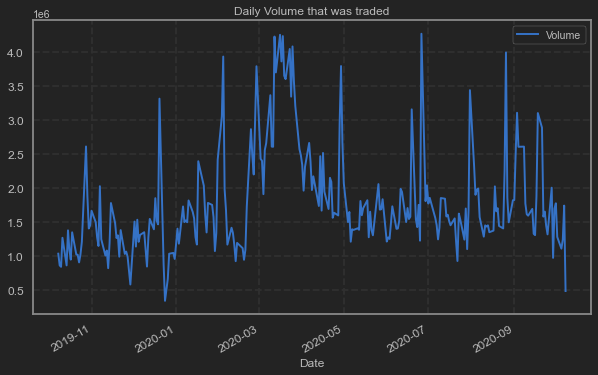

In [10]:
GOOG['Volume'].plot(legend = True, figsize=(10,6), title = "Daily Volume that was traded", fontsize = 12)

We see that the adjusted closing price for Google in March 2020 dramatically decreased. This is most likely due to the COVID-19 pandemic coming into fruition. Causing investors to change their minds and not invest. 



We can also see that the volume corresponds with my hypothesis as it also decreases after March.

However, now that people are becoming more accustomed to the new way of living, people are now trying to start up the economy again and are re-investing. Clearly show just a month later after the pandemic was introduced.

A similar story can be told in September 2020 when the closing price decreases as well as the volume. Most likely due to the "second wave" potential.

# Calculating the Moving Averages

In [11]:
ma_day = [10,20,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()

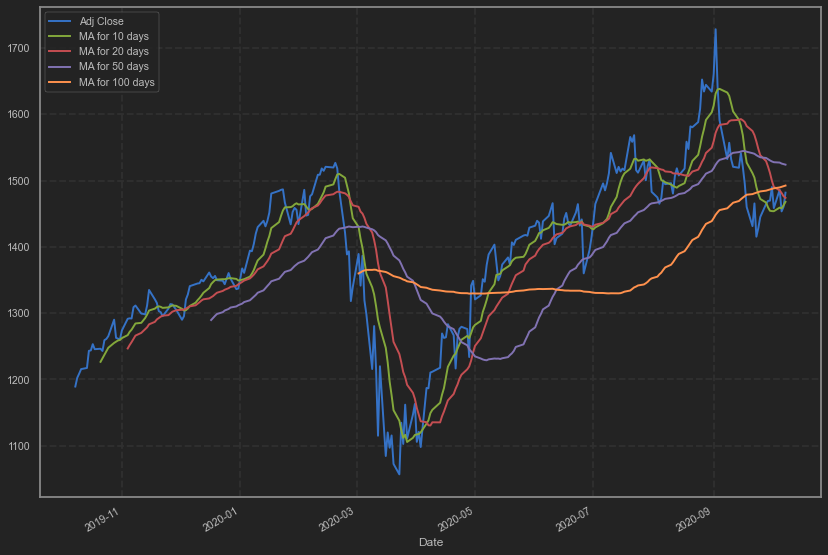

In [12]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize = (14,10))

# Daily Return analysis

I shall take a closer look at the daily changes of the stock. I can use pandas to retrieve the daily returns for the Google stock. I will then use this information to try and analyse the risk of the stock.

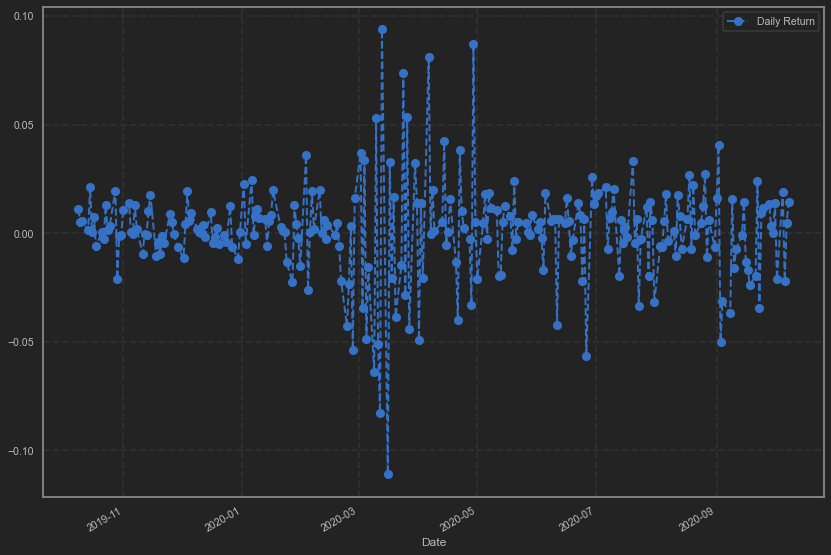

In [13]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

GOOG['Daily Return'].plot(legend = True, figsize = (14,10), linestyle = '--', marker = 'o')

Let's get an overall look at the average daily return using a histogram. We shall also plot the KDE on the same figure to show the distribution of the Daily Return.

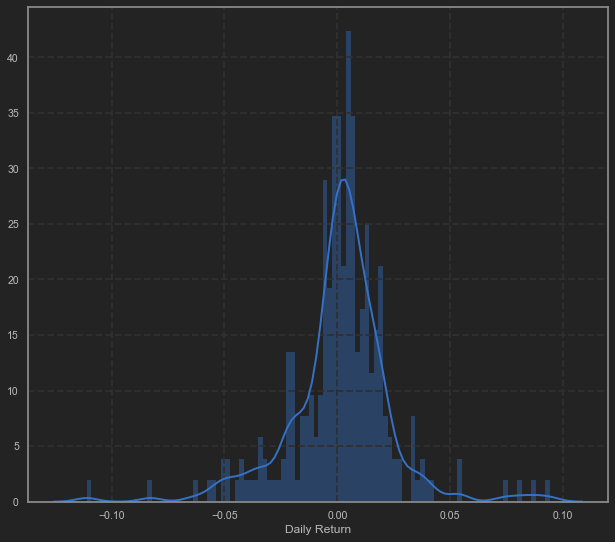

In [14]:
sns.distplot(GOOG['Daily Return'].dropna(),bins =100)

We see that the Daily Return is normally distributed with no evidence of skewness.

Now we shall build a DataFrame with all the 'Close' columns of each stock to analyse all the returns; not just Google.

In [15]:
close_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

close_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-08,55.548851,1189.130005,134.142853,1705.510010
2019-10-09,56.199894,1202.310059,136.683914,1721.989990
2019-10-10,56.957375,1208.670044,137.534241,1720.260010
2019-10-11,58.472343,1215.449951,138.107697,1731.920044
2019-10-14,58.388180,1217.140015,137.979172,1736.430054


In [16]:
tech_return = close_df.pct_change()

tech_return.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-08,NaN,NaN,NaN,NaN
2019-10-09,0.011720,0.011084,0.018943,0.009663
2019-10-10,0.013478,0.005290,0.006221,-0.001005
2019-10-11,0.026598,0.005609,0.004170,0.006778
2019-10-14,-0.001439,0.001390,-0.000931,0.002604


# Correlations

C:\Users\steph\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


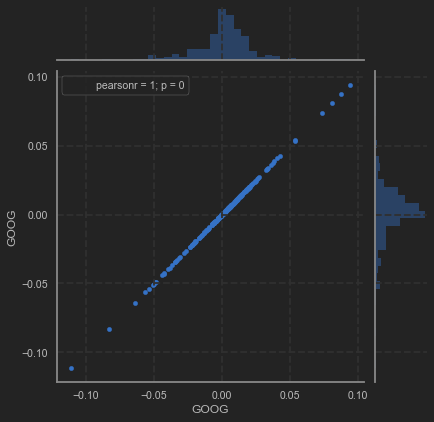

In [17]:
fig = sns.jointplot('GOOG','GOOG',tech_return, kind = 'scatter',marker = '.')
fig.annotate(stats.pearsonr)

Perfectly linear relationship (pearsonr = 1) as expected due to the comparison of google and itself.

C:\Users\steph\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


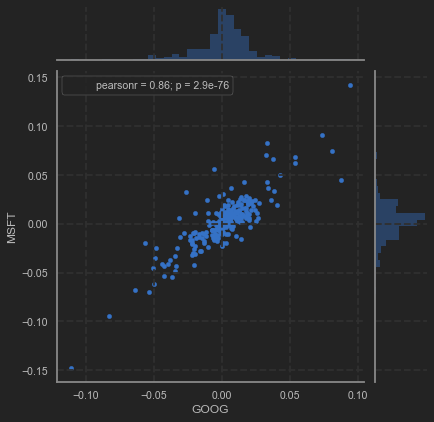

In [18]:
fig = sns.jointplot('GOOG','MSFT',tech_return, kind = 'scatter',marker='.')

fig.annotate(stats.pearsonr)

The product-moment correlation coefficient (r=0.86) shows that the daily percentage returns of Google and Microsoft are strongly positively correlated. Also shown by looking at the almost linear scatter points.


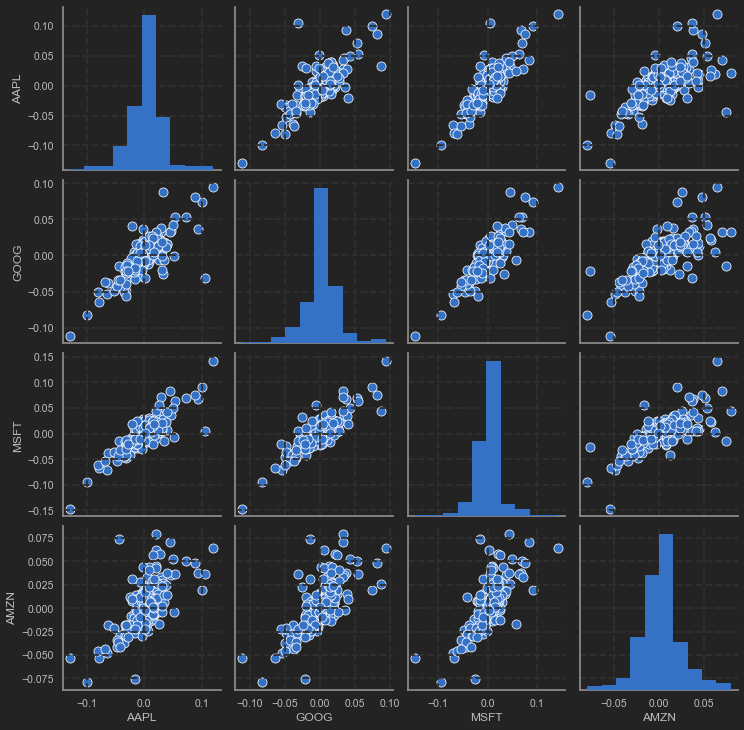

In [19]:
sns.pairplot(tech_return.dropna())

Above we can see all the relationships on daily returns between all the tech stocks. A quick glance shows an interesting correlation between Microsoft and Amazon daily returns. It might be interesting to investigate that individual comaprison. All daily returns appear to be positively correlated. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

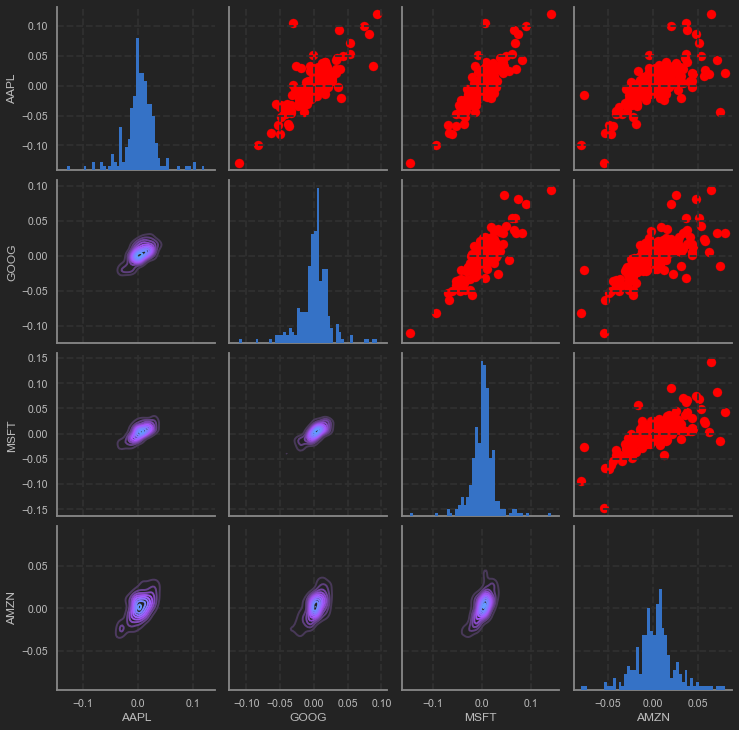

In [20]:
return_fig = sns.PairGrid(tech_return.dropna())

return_fig.map_upper(plt.scatter, color = 'red')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins = 50)

We can clearly see that we have the same scatter in the upper half, as well as the histograms (with more bins), as the previous plot. However, we now show the KDE plots for the various stocks to show the joint distribution between the various daily returns. 

We can therefore conclude that the percentage change of daily returns has a very high probability of only changing in the range (-0.03,0.03).

We can also, of course, analyse the correlation of the closing prices using this exact technique.

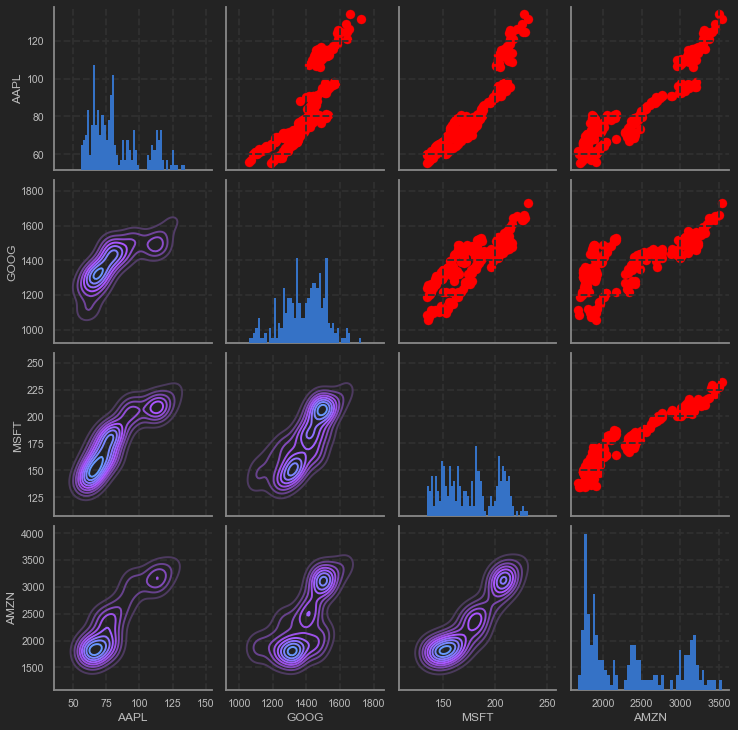

In [21]:
return_fig = sns.PairGrid(close_df)

return_fig.map_upper(plt.scatter, color = 'red')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins = 50)

Notice that there is some separation between the closing prices of the tech stock, indicated by the red scatter graphs.

The KDE also estimate that the joint distribution is quite large in terms of probability range.

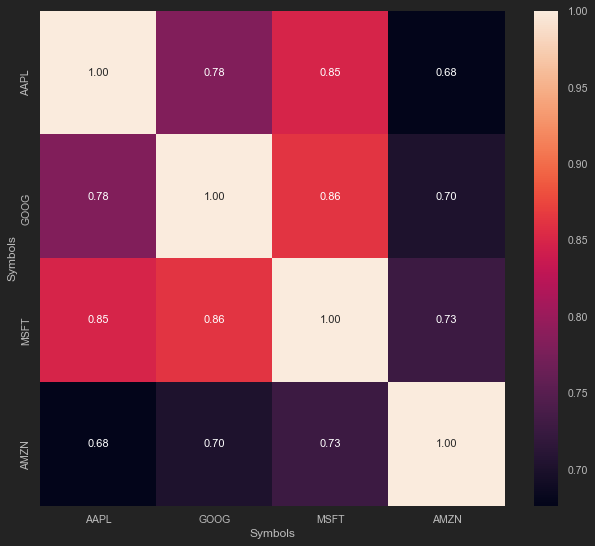

In [22]:
sns.heatmap(tech_return.dropna().corr(), annot = True, fmt = '.2f')

We see that Google and Microsoft have the strongest correlation, with Apple and Microsoft just 0.01 away.

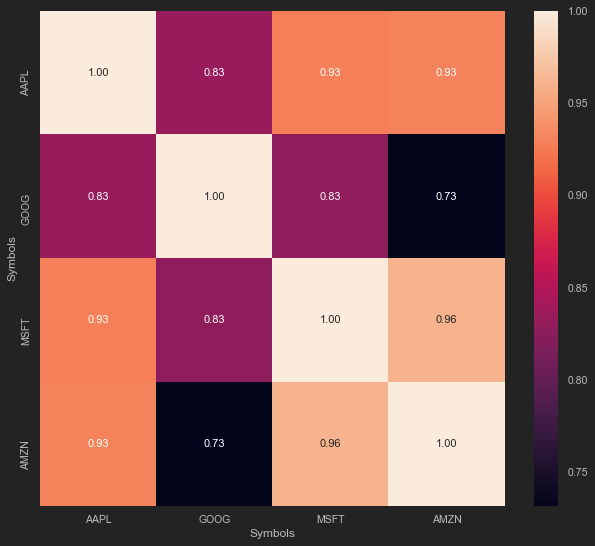

In [23]:
sns.heatmap(close_df.corr(), annot = True, fmt = '.2f')

# Risk Analysis

We shall quantify risk by using the information we've gathered on daily percentage change returns by comparing the expected return with the standard deviation of the daily returns.

In [24]:
returns = tech_return.dropna()

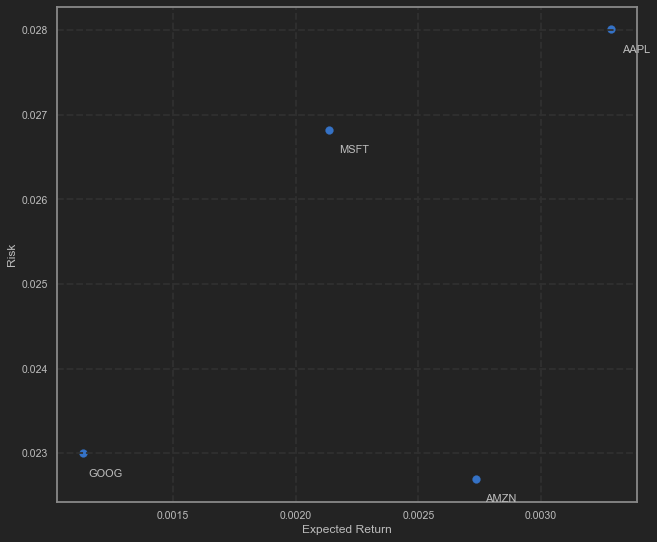

In [25]:
area = np.pi*20

plt.scatter(returns.mean(),returns.std(), s= area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (40,-25),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

From this graph we see that Amazon would be the best stock to invest in, due to its high expected return and low risk.

### Value at Risk

We can treat value at risk as the amount of money we could expect to lose (putting at risk) for a given confidence interval.

#### Value at risk using the "Bootstrap" method

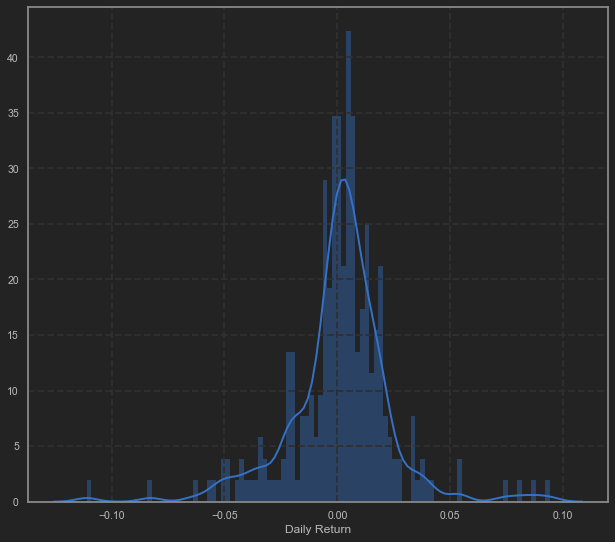

In [26]:
sns.distplot(GOOG['Daily Return'].dropna(), bins = 100)

In [27]:
returns['GOOG'].quantile(0.05)

-0.03899236001034636

The 0.05 empirical quantile of daily returns is at -0.039. That means that with 95% confidence, our worst daily loss will not exceed 3.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.039 * 1,000,000 = $39,000.

In [28]:
returns['AAPL'].quantile(0.05)

-0.04161985444024205

In [29]:
returns['MSFT'].quantile(0.05)

-0.041179413372621564

In [30]:
returns['AMZN'].quantile(0.05)

-0.03040810099387796

We see that Amazon has the lowest risk with a worst daily loss of 3.04%. 

Apple has the most risk.

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

We will use geometric Brownian motion learnt during my Stochastic Financial Modelling module.

In [31]:
days = 365

dt = 1/days

# Drift
mu = returns.mean()['GOOG']

# Volatility
sigma = returns.std()['GOOG']

In [32]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [33]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2019-10-08,1206.079956,1189.010010,1197.589966,1189.130005,1039300,1189.130005,NaN,NaN,NaN,NaN,NaN
2019-10-09,1208.349976,1197.630005,1199.349976,1202.310059,867700,1202.310059,NaN,NaN,NaN,NaN,0.011084
2019-10-10,1215.000000,1197.339966,1198.579956,1208.670044,846600,1208.670044,NaN,NaN,NaN,NaN,0.005290
2019-10-11,1228.390015,1213.739990,1222.209961,1215.449951,1272700,1215.449951,NaN,NaN,NaN,NaN,0.005609
2019-10-14,1226.329956,1211.760010,1212.339966,1217.140015,867500,1217.140015,NaN,NaN,NaN,NaN,0.001390


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

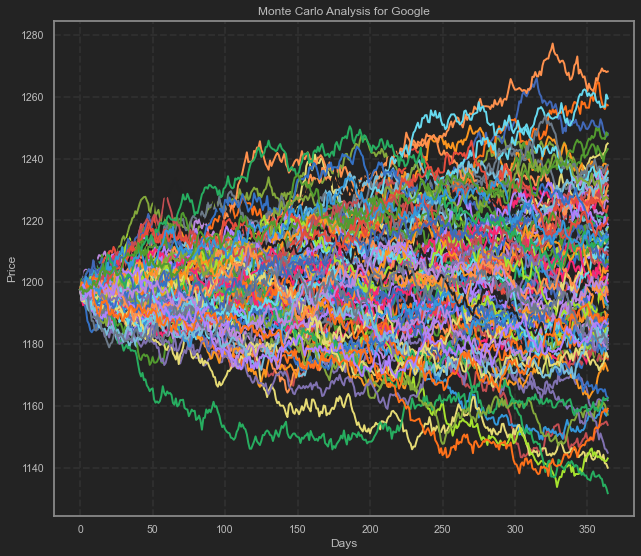

In [34]:
start_price = GOOG['Open'][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [35]:
runs = 10000

simulations = np.zeros(runs)

# Set the print options of NumPy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Shall use the quantiles to define our risk for this stock and plot a histogram of this information.

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

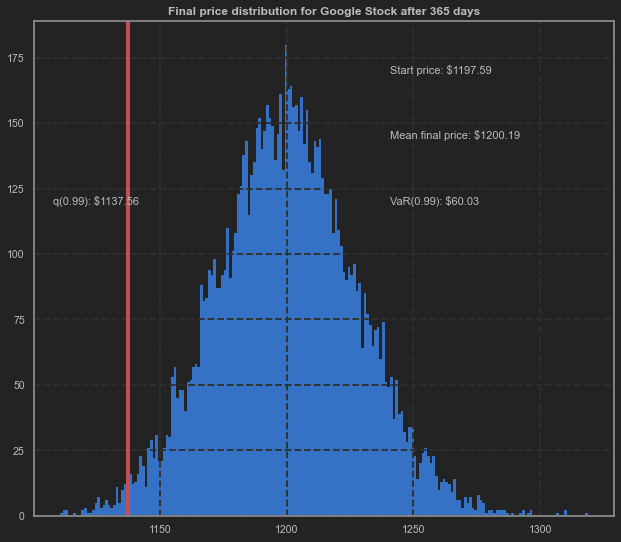

In [36]:
q = np.percentile(simulations, 1) # 1% empirical quantile

plt.hist(simulations,bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6, 0.8, s = "Start price: $%.2f" % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plots line at the 1% quantile result
plt.axvline(x=q, linewidth = 4, color = 'r')

# Title
plt.title("Final price distribution for Google Stock after %s days" % days, weight = 'bold')

The Value at Risk for the Google stock seems to be $59.47, for every investment of 1197.59 (price of one inital Google stock).

This basically means for every initial stock you purchase your putting about $59.47 at risk 99% of the time from our Monte Carlo Simulation.

We can use both the bootstrap and Monte Carlo method for the other tech stocks as well. However, I will not go through it as it will be repetitive